In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.sandbox.regression.gmm import GMM

In [6]:
input_table = pd.read_csv('/Users/aishafathi/Downloads/small_retailers_stock_performance.csv')

In [7]:
input_table.head()

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446


In [8]:
input_table

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446
...,...,...,...,...,...,...,...,...
1691,1,-0.015543,5.225766,0.309119,1.615384,3.554503,2.197871,0.005549
1692,1,0.399089,5.324390,0.274782,1.463044,3.745006,2.324502,0.004359
1693,1,-0.702200,5.575258,0.287503,1.602905,3.434909,2.282626,0.000000
1694,1,0.283926,5.423463,0.256657,1.391968,2.876645,1.454948,0.000000


we have 1696 data points for 1696 companies from their statements

In [10]:
# build a stock change model 
Y = input_table['Stock Change']
X = input_table[['Constant','Inventory Turnover', 'Operating Profit','Interaction Effect']]
baseline_model = sm.OLS(Y,X).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock Change   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.757
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.82e-05
Time:                        20:03:14   Log-Likelihood:                -1187.7
No. Observations:                1696   AIC:                             2383.
Df Residuals:                    1692   BIC:                             2405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant           -1.242e-11      0

In [16]:
# generate predictions
Predictions = baseline_model.predict(X)

In [18]:
# residual analysis to show the problem we have 
residuals = pd.DataFrame([Y, Predictions,(Y - Predictions)]).T 
residuals.columns = ['Y','Predictions','Residuals']
residuals.head()

,Y,Predictions,Residuals
0,0.870332,-0.013003,0.883335
1,-0.047347,-0.051144,0.003797
2,0.001176,-0.063139,0.064315
3,-0.901200,-0.063014,-0.838187
4,-0.176353,-0.063093,-0.113260


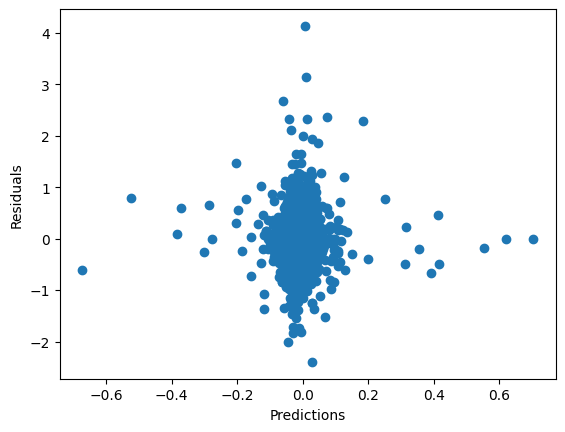

In [ ]:
plt.scatter(residuals['Predictions'], residuals['Residuals'])
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

this is our baseline model

In [20]:
# for the IV model the first step is to predict the inventory turnover
iv_Y = input_table['Inventory Turnover']
iv_X = input_table[['Constant','Current Ratio','Quick Ratio', 'Debt Asset Ratio']]
model_iv = sm.OLS(iv_Y,iv_X).fit()
print(model_iv.summary())

                            OLS Regression Results                            
Dep. Variable:     Inventory Turnover   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     258.4
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          5.04e-138
Time:                        20:07:05   Log-Likelihood:                -8212.4
No. Observations:                1696   AIC:                         1.643e+04
Df Residuals:                    1692   BIC:                         1.645e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Constant            46.4258      1.434  

In [21]:
# current ratio means can we pay our debt with our current assets 
# the current ratio and quick ratio are related to each other and will details about what ... check the recording


In [22]:
# use model iv to make predictions
endog_pred = model_iv.predict(iv_X)

In [23]:
input_table['Endogenous Param'] = endog_pred

In [24]:
input_table

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio,Endogenous Param
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317,10.724599
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967,10.812673
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269,9.001338
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399,11.995705
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446,13.536649
...,...,...,...,...,...,...,...,...,...
1691,1,-0.015543,5.225766,0.309119,1.615384,3.554503,2.197871,0.005549,13.504958
1692,1,0.399089,5.324390,0.274782,1.463044,3.745006,2.324502,0.004359,11.994641
1693,1,-0.702200,5.575258,0.287503,1.602905,3.434909,2.282626,0.000000,19.312977
1694,1,0.283926,5.423463,0.256657,1.391968,2.876645,1.454948,0.000000,10.094274


In [25]:
# run the sls model with the endegenous parameters 
Y_sls = input_table['Stock Change']
X_sls = input_table[['Constant','Endogenous Param', 'Operating Profit','Interaction Effect']]
sls_model = sm.OLS(Y_sls,X_sls).fit()
print(sls_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock Change   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.530
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.27e-05
Time:                        20:12:07   Log-Likelihood:                -1186.5
No. Observations:                1696   AIC:                             2381.
Df Residuals:                    1692   BIC:                             2403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant              -0.0176      0

it doesn't change a lot and the previous was better

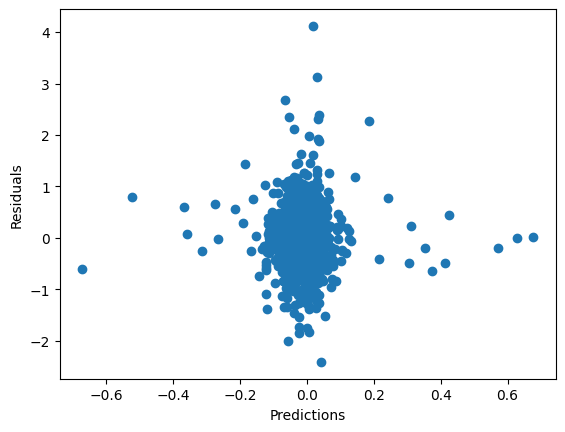

In [26]:
sls_pred = sls_model.predict(X_sls)
residuals = pd.DataFrame([Y_sls, sls_pred,(Y_sls - sls_pred)]).T
residuals.columns = ['Y','Predictions','Residuals']

plt.scatter(residuals['Predictions'], residuals['Residuals'])
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [27]:
# defined the algorithm by hand 
y_vals = np.array(input_table['Stock Change'])
x_vals = np.array(input_table[['Inventory Turnover','Operating Profit','Interaction Effect']])
iv_vals = np.array(input_table[['Current Ratio','Quick Ratio','Debt Asset Ratio']])

In [28]:
# for each observation we will look at the moments function and minimize the moments
class gmm(GMM):
  def momcond(self, params):
    p0, p1, p2, p3 = params # coefficients Inventory Turnover, Op Profit, Interaction Effect
    endog = self.endog
    exog = self.exog
    inst = self.instrument

    error0 = endog - p0 - p1*exog[:,0] - p2*exog[:, 1] - p3 * exog[:,2]
    error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1]
    error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2]
    error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] 
    error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] 
    error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] 

    g = np.column_stack((error0, error1, error2, error3, error4, error5))
    return g

beta0 = np.array([0.1, 0.1, 0.1, 0.1])

In [29]:
res = gmm(endog=y_vals, exog=x_vals, instrument=iv_vals, k_moms=6, k_params=4).fit(beta0)

Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000373
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [30]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6317
Model:                            gmm   Prob (Hansen J):                 0.729
Method:                           GMM                                         
Date:                Tue, 07 Oct 2025                                         
Time:                        20:23:10                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0200      0.021     -0.964      0.335      -0.061       0.021
p 1            0.0011      0.001      1.843      0.065   -6.89e-05       0.002
p 2           -0.1071      0.032     -3.370      0.001      -0.169      -0.045
p 3            0.0011      0.000      2.760      0.006       0.000       0.002
==============================================================================
"""

In [32]:
ac = residuals['Residuals']

In [33]:
ac = residuals['Residuals']
ac = ac.to_frame()

In [34]:
ac['Lag1'] = ac['Residuals'].shift(1)

In [35]:
ac['Lag2'] = ac['Residuals'].shift(2)

In [36]:
ac['Lag3'] = ac['Residuals'].shift(3)

In [37]:
ac.corr()

,Residuals,Lag1,Lag2,Lag3
Residuals,1.000000,-0.122647,-0.145330,-0.047142
Lag1,-0.122647,1.000000,-0.122683,-0.145371
Lag2,-0.145330,-0.122683,1.000000,-0.122231
Lag3,-0.047142,-0.145371,-0.122231,1.000000


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

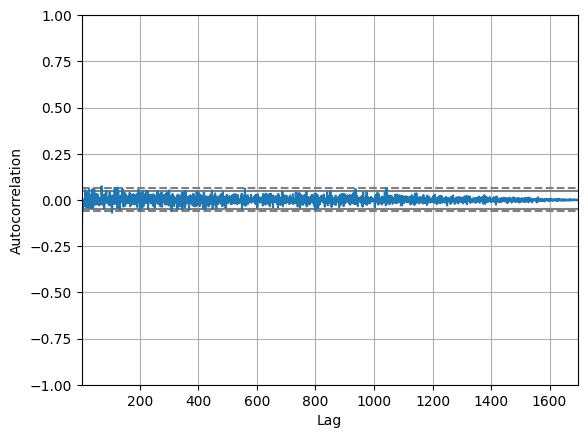

In [38]:
pd.plotting.autocorrelation_plot(residuals['Residuals'])

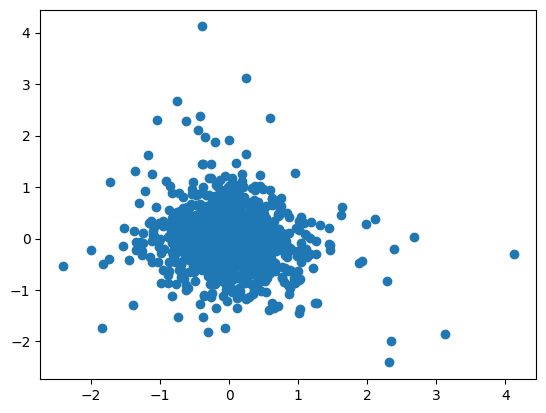

In [39]:
plt.scatter(ac['Residuals'],ac['Lag1'])

In [40]:
residuals['Residuals'].abs().mean()

np.float64(0.34050415488565744)